### Load Dataset

In [2]:
import pandas as pd
import numpy as np

clients = pd.read_csv('../data/processed/clients.csv')


In [3]:
clients[clients['client_id'] == 365042657][['client_id','median_promotor_visits']]

,client_id,median_promotor_visits
12405,365042657,20.0


In [4]:
# Check balance: include both count and percentage columns
balance_counts = clients['class'].value_counts().rename_axis('class').reset_index(name='count')
balance_percent = clients['class'].value_counts(normalize=True).rename_axis('class').reset_index(name='percentage')
balance = pd.merge(balance_counts, balance_percent, on='class')
(balance)

,class,count,percentage
0,HighTicket_Efficient,19280,0.459595
1,LowTicket_Efficient,14993,0.357402
2,HighTicket_Inefficient,4137,0.098617
3,LowTicket_Inefficient,3540,0.084386


In [5]:
hv_ineff = clients[clients['class'] == 'HighTicket_Inefficient'].copy()
lv_ineff = clients[clients['class'] == 'LowTicket_Inefficient'].copy()

# existing counts
n_hv = len(hv_ineff)
n_lv = len(lv_ineff)

# total inefficient
n_total = n_hv + n_lv

print(f"High‐ticket inefficient clients: {n_hv} rows")
print(f"Low‐ticket inefficient clients:  {n_lv} rows")
print(f"Total inefficient clients:      {n_total} rows")

High‐ticket inefficient clients: 4137 rows
Low‐ticket inefficient clients:  3540 rows
Total inefficient clients:      7677 rows


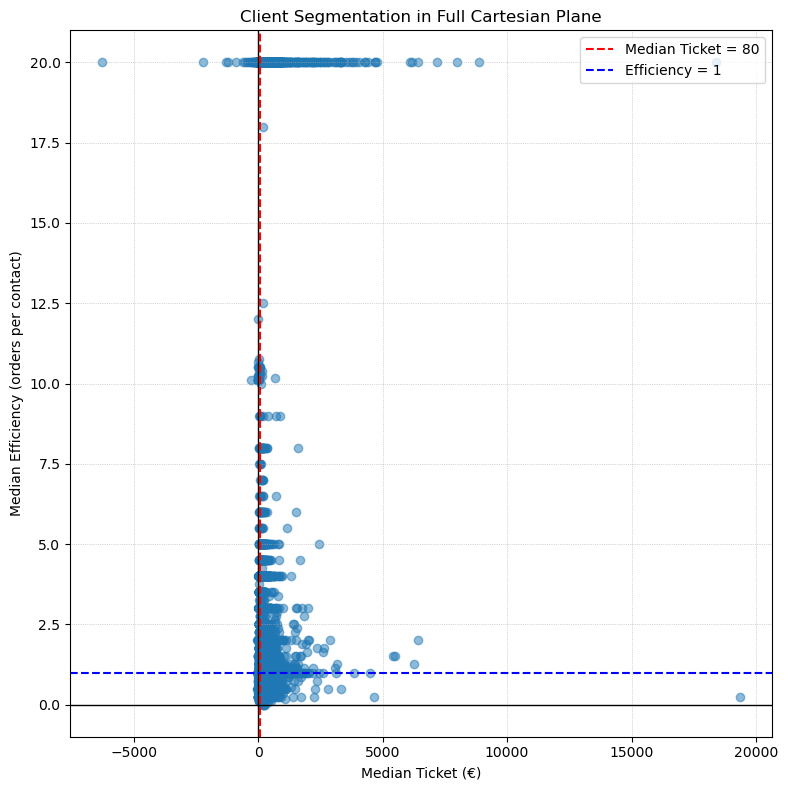

In [67]:
import matplotlib.pyplot as plt



x = clients['median_ticket']
y = clients['efficiency']

plt.figure(figsize=(8,8))

# scatter all points (you can color by quadrant as before)
plt.scatter(x, y, alpha=0.5)

# draw the main axes at zero
plt.axvline(0, color='black', linewidth=1)
plt.axhline(0, color='black', linewidth=1)

# draw your business thresholds
plt.axvline(80, color='red', linestyle='--', label='Median Ticket = 80')
plt.axhline(1,  color='blue', linestyle='--', label='Efficiency = 1')

plt.xlabel('Median Ticket (€)')
plt.ylabel('Median Efficiency (orders per contact)')
plt.title('Client Segmentation in Full Cartesian Plane')
plt.legend(loc='upper right')
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

plt.tight_layout()
plt.show()

#### Insight 1: Most clients have inneficienties in their contacts or visits for high and low median ticket values

In [6]:
# Check balance: include both count and percentage columns
balance_counts = clients['class'].value_counts().rename_axis('class').reset_index(name='count')
balance_percent = clients['class'].value_counts(normalize=True).rename_axis('class').reset_index(name='percentage')
balance = pd.merge(balance_counts, balance_percent, on='class')
(balance)

,class,count,percentage
0,HighTicket_Efficient,19280,0.459595
1,LowTicket_Efficient,14993,0.357402
2,HighTicket_Inefficient,4137,0.098617
3,LowTicket_Inefficient,3540,0.084386


In [7]:
clients.columns

Index(['client_id', 'city', 'channel', 'promotor_id', 'frequency',
       'efficiency', 'efficiency_scaled', 'total_orders', 'total_volume',
       'total_income', 'total_cost', 'total_profit', 'median_ticket',
       'median_ticket_min', 'median_ticket_max', 'median_ticket_std',
       'median_promotor_visits', 'total_promotor_visits',
       'median_promotor_calls', 'total_promotor_calls', 'class',
       'zero_visit_flag', 'avg_orders_per_month', 'avg_visits_per_month',
       'visit_order_gap', 'inefficiency_cost', 'profit_per_visit',
       'opportunity_cost'],
      dtype='object')

#### High-Ticket & Inefficient clients

In [8]:
# Filter High-Value & Inefficient clients
hv_ineff = clients[clients['class'] == 'HighTicket_Inefficient'].copy()

# Build the reporting table
df_hv_ineff = hv_ineff.reset_index()[[
    'client_id',
    'channel',
    'median_ticket',
    'total_orders',
    'median_promotor_visits',
    'avg_orders_per_month',
    'avg_visits_per_month',
    'visit_order_gap',
    'efficiency',
    'inefficiency_cost',
    'median_promotor_calls',
    'total_promotor_calls',
    'total_profit',
    'profit_per_visit',
    'opportunity_cost'
]].sort_values('opportunity_cost', ascending=False)

# Display first 10 rows
df_hv_ineff.head(10)

,client_id,channel,median_ticket,total_orders,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost
1649,468285491,AR,1316.035,58,8.0,4.833333,8.000000,3.166667,0.5625,47.50,0.0,0.0,141247.96,1471.332917,4659.220903
1872,515068007,AR,19350.000,5,4.0,0.416667,1.000000,0.583333,0.2500,8.75,0.0,0.0,68985.52,5748.793333,3353.462778
257,156697011,AR,3331.800,16,4.0,1.333333,2.333333,1.000000,0.5000,15.00,0.0,0.0,79203.68,2828.702857,2828.702857
266,158556116,AR,1713.600,65,8.0,5.416667,6.666667,1.250000,0.8750,18.75,0.0,0.0,148318.93,1853.986625,2317.483281
2095,566053063,HR,4674.300,6,4.0,0.500000,1.666667,1.166667,0.2500,17.50,0.0,0.0,35338.29,1766.914500,2061.400250
2686,688971420,AR,682.500,65,8.0,5.416667,8.000000,2.583333,0.6875,38.75,0.0,0.0,66124.79,688.799896,1779.399731
3680,909583679,AR,2364.795,37,4.0,3.083333,4.000000,0.916667,0.7500,13.75,0.0,0.0,91251.93,1901.081875,1742.658385
3480,867374053,HR,817.500,40,8.0,3.333333,8.000000,4.666667,0.3750,70.00,0.0,0.0,33144.51,345.255313,1611.191458
3511,871894926,AR,1010.160,53,8.0,4.416667,7.333333,2.916667,0.6250,43.75,0.0,0.0,48353.22,549.468409,1602.616193
2385,630756629,AR,1079.710,21,8.0,1.750000,6.666667,4.916667,0.1875,73.75,0.0,0.0,24590.81,307.385125,1511.310198


In [9]:
df_channel_hv_ineff = (
    df_hv_ineff
    .groupby('channel')
    .agg(
        tickets_count         = ('median_ticket',   'count'),
        median_ticket         = ('median_ticket',   'median'),
        median_efficiency     = ('efficiency',      'median'),
        median_visit_order_gap= ('visit_order_gap', 'median')
    )
    .reset_index()
)

df_channel_hv_ineff 

,channel,tickets_count,median_ticket,median_efficiency,median_visit_order_gap
0,AR,2068,123.525,0.5,0.500000
1,HR,2069,115.800,0.5,0.583333


In [10]:
df_hv_ineff.describe()

,client_id,median_ticket,total_orders,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost
count,4.137000e+03,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,5.570350e+08,168.579971,16.700991,3.270486,1.391749,2.104262,0.712513,0.564889,10.687696,0.177423,1.192289,2155.179737,78.867424,53.969902
std,2.609673e+08,343.731947,14.793609,1.461823,1.232801,1.638911,0.657461,0.171221,9.861909,0.631570,5.033262,6012.265936,154.635071,152.627319
min,1.000422e+08,80.000000,0.000000,1.000000,0.000000,0.083333,-0.083333,0.000000,-1.250000,0.000000,0.000000,-18067.580000,-94.101979,-330.837361
25%,3.305777e+08,94.690000,6.000000,2.000000,0.500000,0.833333,0.250000,0.500000,3.750000,0.000000,0.000000,377.180000,28.545625,11.270833
50%,5.601824e+08,119.595000,13.000000,4.000000,1.083333,1.666667,0.500000,0.500000,7.500000,0.000000,0.000000,960.300000,48.565208,24.070000
75%,7.859651e+08,171.310000,24.000000,4.000000,2.000000,3.666667,0.916667,0.750000,13.750000,0.000000,0.000000,1955.630000,83.166667,49.270000
max,9.997560e+08,19350.000000,169.000000,28.000000,14.083333,16.000000,6.500000,0.958333,97.500000,4.000000,48.000000,148318.930000,5748.793333,4659.220903


In [28]:
# client’s ID as a scalar
worst_client_id = df_hv_ineff.loc[
    df_hv_ineff['client_id'] == 468285491, 'client_id'
].iloc[0]

#  opportunity cost
opportunity_cost = df_hv_ineff.loc[
    df_hv_ineff['client_id'] == worst_client_id, 'opportunity_cost'
].iloc[0]
print(f'Client {worst_client_id} with most opportunity cost: {opportunity_cost:,}')

# 3) filter the orders DataFrame
df_client = df_hv_ineff[df_hv_ineff['client_id'] == worst_client_id]
n_days = len(df_client)
total_orders = df_client['number_of_orders'].sum()
print(f"Client {worst_client_id} appears on {n_days} days and placed {total_orders} orders in total.")

# 4)  visits
visits = df_client['promotor_visits'].sum()
print(f"Client {worst_client_id} has {visits} visits in total.")

Client 468285491 with most opportunity cost: 4,659.220902777778


KeyError: 'number_of_orders'

In [11]:
inefficiency_cost= df_hv_ineff['inefficiency_cost'].sum().round()
print(f'The cost due to inefficiencies is €{inefficiency_cost:,}')

total_profit = (
    df_hv_ineff['profit_per_visit'] 
  * df_hv_ineff['total_orders']
).sum().round()

print(f'The total profit is €{total_profit:,}')

cost_of_opportunity = df_hv_ineff['opportunity_cost'].sum().round()
print(f'The cost of opportunity is €{cost_of_opportunity:,}')  

median_gap = df_hv_ineff['visit_order_gap'].median()
print(f'The median gap is {median_gap:,}')

avg_gap = df_hv_ineff['visit_order_gap'].std()
print(f'The std gap is {avg_gap:,}')

The cost due to inefficiencies is €44,215.0
The total profit is €6,236,697.0
The cost of opportunity is €223,273.0
The median gap is 0.5
The std gap is 0.6574606174627983


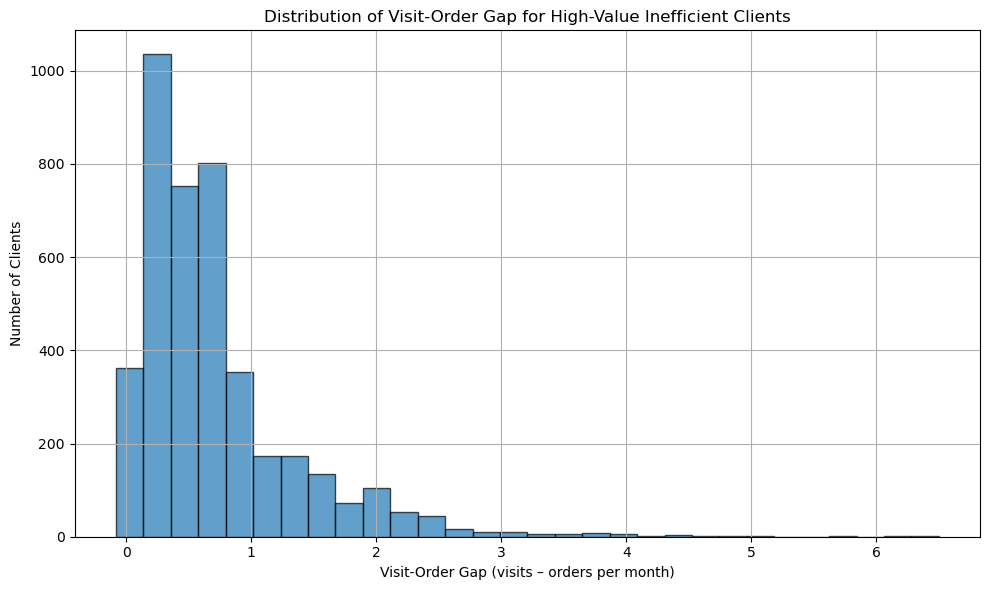

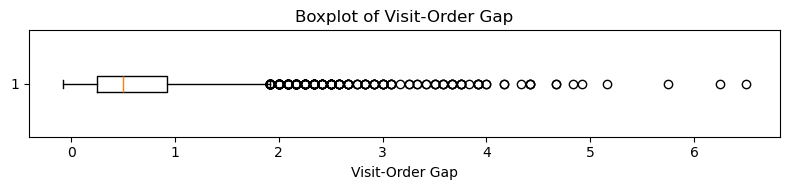

In [13]:
import matplotlib.pyplot as plt
# Extract the gap
gap = hv_ineff['visit_order_gap'].dropna()

#  Histogram
plt.figure(figsize=(10, 6))
plt.hist(gap, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Visit-Order Gap (visits – orders per month)')
plt.ylabel('Number of Clients')
plt.title('Distribution of Visit-Order Gap for High-Value Inefficient Clients')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Boxplot
plt.figure(figsize=(8, 2))
plt.boxplot(gap, vert=False)
plt.xlabel('Visit-Order Gap')
plt.title('Boxplot of Visit-Order Gap')
plt.tight_layout()
plt.show()

In [98]:
# define your bins and labels
bins = [0, 1, 2, gap.max() + 1e-6]   # add a tiny epsilon so the max is included
labels = ['0 ≤ gap < 1', '1 ≤ gap < 2', f'2 ≤ gap ≤ {gap.max():.1f}']

# cut into categories
categories = pd.cut(gap, bins=bins, right=False, labels=labels)

# compute value counts as percentages
pct = categories.value_counts(normalize=True) * 100

# print nicely
for label, p in pct.items():
    print(f"{label}: {p:.2f}% of clients")

0 ≤ gap < 1: 77.38% of clients
1 ≤ gap < 2: 16.98% of clients
2 ≤ gap ≤ 6.5: 5.64% of clients


#### High-Ticket Inefficient Distribution:

~77% of clients have a visit-order gap under 1.

16.98% beteen 1 and below 2 visit gaps

5.64% areoutliers (gap ≥ 2).

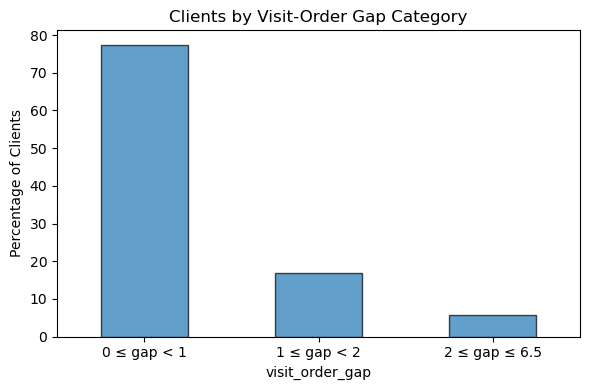

In [15]:
pct.plot.bar(figsize=(6,4), edgecolor='black', alpha=0.7)
plt.ylabel('Percentage of Clients')
plt.title('Clients by Visit-Order Gap Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

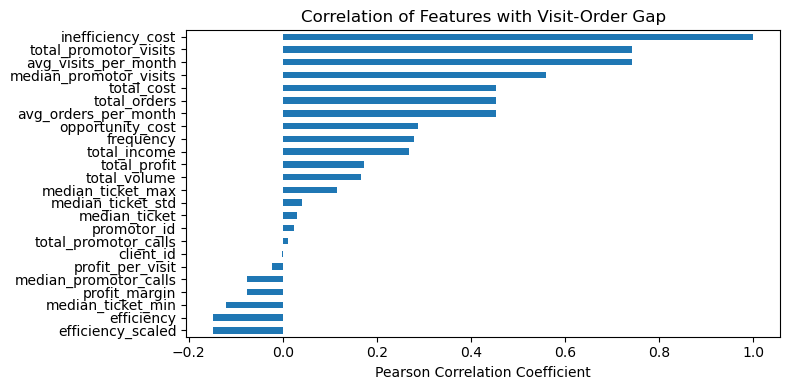

In [52]:
import numpy as np
numeric = hv_ineff.select_dtypes(include=[np.number])
visit_corr = numeric.corr()['visit_order_gap'].drop('visit_order_gap').sort_values()

# 3) Plot bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
visit_corr.plot(kind='barh')
plt.title('Correlation of Features with Visit-Order Gap')
plt.xlabel('Pearson Correlation Coefficient')
plt.tight_layout()
plt.show()

margin_segment
high_margin    2069
low_margin     2068
Name: count, dtype: int64
                 count      mean       std       min       25%       50%  \
margin_segment                                                             
high_margin     2069.0  0.584944  0.545368 -0.083333  0.250000  0.500000   
low_margin      2068.0  0.840143  0.731280 -0.083333  0.333333  0.583333   

                     75%   max  
margin_segment                  
high_margin     0.666667  6.25  
low_margin      1.083333  6.50  


<Figure size 800x500 with 0 Axes>

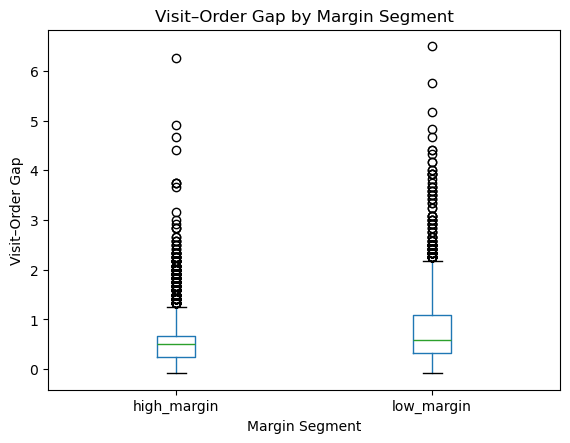

In [17]:
# 1) Compute a margin metric for each client
hv_ineff['profit_margin'] = hv_ineff['total_profit'] / hv_ineff['total_cost']

# 2) Split into “low-margin” vs “high-margin”
#    Here I use the median margin as a cut-off; you can also use quantiles (e.g. pd.qcut) or a business threshold.
median_margin = hv_ineff['profit_margin'].median()
hv_ineff['margin_segment'] = hv_ineff['profit_margin'].apply(
    lambda m: 'low_margin' if m < median_margin else 'high_margin'
)

# 3) Check how many in each segment
print(hv_ineff['margin_segment'].value_counts())

# 4) Compare the visit–order gap distributions
summary = hv_ineff.groupby('margin_segment')['visit_order_gap'].describe()
print(summary)

# 5) (Optional) Visualize side-by-side
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
hv_ineff.boxplot('visit_order_gap', by='margin_segment', grid=False)
plt.suptitle('')
plt.title('Visit–Order Gap by Margin Segment')
plt.xlabel('Margin Segment')
plt.ylabel('Visit–Order Gap')
plt.show()

In [18]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# 1) Summary stats
grouped = hv_ineff.groupby('margin_segment')['visit_order_gap']
summary = grouped.agg(count='count', mean='mean', median='median', std='std')
print("Summary statistics by margin segment:\n", summary)

# 2) Extract the two arrays
high_gap = hv_ineff.loc[hv_ineff.margin_segment=='high_margin', 'visit_order_gap']
low_gap  = hv_ineff.loc[hv_ineff.margin_segment=='low_margin',  'visit_order_gap']

# 3) Welch’s t-test (doesn’t assume equal variances)
t_stat, p_val = ttest_ind(low_gap, high_gap, equal_var=False)
print(f"\nWelch’s t-test: t = {t_stat:.3f}, p = {p_val:.3f}")

# 4) Mann–Whitney U (non-parametric)
u_stat, p_u = mannwhitneyu(low_gap, high_gap, alternative='two-sided')
print(f"Mann–Whitney U: U = {u_stat:.3f}, p = {p_u:.3f}")


Summary statistics by margin segment:
                 count      mean    median       std
margin_segment                                     
high_margin      2069  0.584944  0.500000  0.545368
low_margin       2068  0.840143  0.583333  0.731280

Welch’s t-test: t = 12.723, p = 0.000
Mann–Whitney U: U = 2640953.000, p = 0.000


Welch’s t-test:
What it tests: Difference in group means.

Mann–Whitney U:
What it tests: Interpreted as a test of whether values in one group tend to be larger than in the other.

Insight: Low-margin in HighTicket_Inefficient clients really do have noticeably larger visit–order

Mean difference: 0.84 – 0.585 ≈ 0.255 visits/month

Median difference: 0.583 – 0.500 = 0.083 visits/month

Both the Welch’s t-test (t = 12.72, p < 0.001) and Mann–Whitney U (p < 0.001) confirm that this difference is highly statistically significant.

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# 1) Select your extended feature list
features = [
    'avg_visits_per_month',
    'total_promotor_visits',
    'total_orders',
    'total_cost',
    'total_income',
    'total_profit',
    'frequency',
    'efficiency',
    'efficiency_scaled',
    'profit_margin'
]

X = hv_ineff[features]
y = hv_ineff['visit_order_gap']

# 2) Fit a simple RF
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 3) Examine importances
importances = pd.Series(model.feature_importances_, index=features)
print("Feature importances (RF):")
print(importances.sort_values(ascending=False))

# 4) (Optional) Quick 5-fold CV to get an R² estimate
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\n5-fold CV R²: {scores.mean():.3f} ± {scores.std():.3f}")


Feature importances (RF):
avg_visits_per_month     0.351934
total_promotor_visits    0.289381
efficiency               0.149512
efficiency_scaled        0.135636
total_orders             0.042084
total_cost               0.021082
frequency                0.003567
profit_margin            0.002805
total_income             0.002262
total_profit             0.001738
dtype: float64

5-fold CV R²: 0.978 ± 0.015


The visit volume is the strongest driver of inefficiency for both. Profit-related fields (profit_margin, total_profit) have almost zero predictive value for the visit gap — which supports the idea that profit is a result of inefficiency, not its cause.


Regardless of ticket size, inefficiency is:

 - Behavioral (too many visits)

- Not driven by profit size

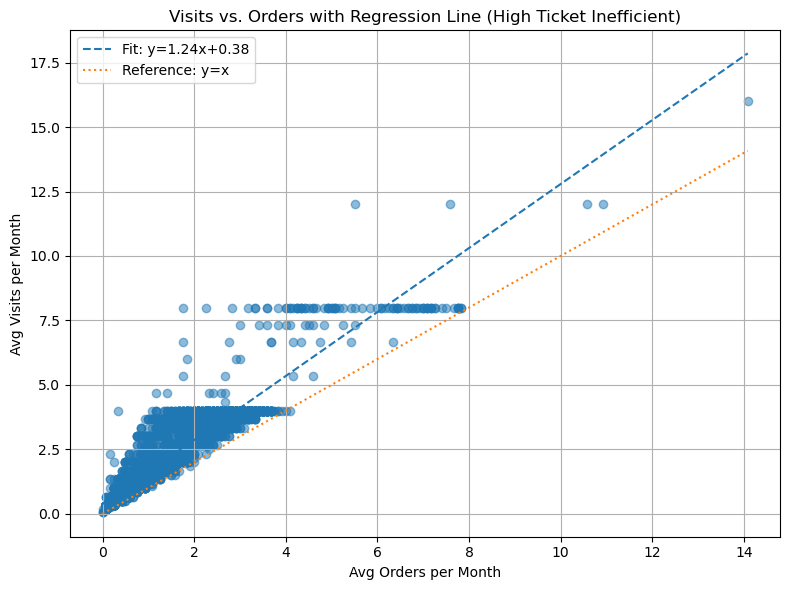

In [21]:
# Prepare data
x = hv_ineff['avg_orders_per_month']
y = hv_ineff['avg_visits_per_month']

#  Fit a linear regression line
slope, intercept = np.polyfit(x, y, deg=1)

# Line endpoints
x_line = np.array([x.min(), x.max()])
y_line = slope * x_line + intercept


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x_line, y_line, linestyle='--', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
plt.plot(x_line, x_line, linestyle=':', label='Reference: y=x')

plt.xlabel('Avg Orders per Month')
plt.ylabel('Avg Visits per Month')
plt.title('Visits vs. Orders with Regression Line (High Ticket Inefficient)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### REGRESSION VISUALIZATION
    visits > orders (obviously inefficient):

High-Ticket: y ≈ 1.24x + 0.38

Low-Ticket: y ≈ 1.28x + 0.33

For every 1 more order per month, promotors are making 1.24 more visits on average. This reflects inefficiency  promotors must visit more than once to get an order.
0.38 (intercept):	Even if a client places 0 orders, they still get ~0.38 visits per month — likely baseline/check-in visits.
Promotors are making ~24% more visits than the number of orders

Insight: The structure of inefficiency is the same: Promotors keep visiting even when orders don’t come. This means inefficiency isn’t a data noise

In [22]:
# drop extreme order‐volume outliers
mask = hv_ineff['avg_orders_per_month'] <= 30
hv_typical = hv_ineff[mask]

# fit again
slope_t, intercept_t = np.polyfit(
    hv_typical['avg_orders_per_month'],
    hv_typical['avg_visits_per_month'],
    deg=1
)
print(f"Refit slope (orders≤30): {slope_t:.2f}")


Refit slope (orders≤30): 1.24


In [57]:
hv_clustering_features = [
    'median_ticket',
    'avg_visits_per_month',
    'avg_orders_per_month',
    'visit_order_gap',
    'inefficiency_cost',
    'opportunity_cost',
    
]
from sklearn.preprocessing import StandardScaler

X = df_hv_ineff[hv_clustering_features]  
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df_hv_ineff['cluster'] = kmeans.fit_predict(X_scaled)

In [47]:

cluster_counts = df_hv_ineff['cluster'].value_counts().rename('Clients')

cluster_medians = df_hv_ineff.groupby('cluster')[hv_clustering_features].median().round(2)

df_cluster_summary = pd.concat([cluster_medians, cluster_counts], axis=1).reset_index()

cols = ['cluster', 'Clients'] + hv_clustering_features
df_cluster_summary = df_cluster_summary[cols]

# 5. Display the result
df_cluster_summary = df_cluster_summary.sort_values(by='Clients', ascending=False).reset_index(drop=True)
df_cluster_summary

,cluster,Clients,median_ticket,avg_visits_per_month,avg_orders_per_month,visit_order_gap,inefficiency_cost,opportunity_cost
0,0,2737,116.57,1.17,0.67,0.42,6.25,18.13
1,3,1292,123.47,4.00,2.58,1.08,16.25,48.78
2,1,107,235.23,8.00,4.17,2.92,43.75,214.02
3,2,1,19350.00,1.00,0.42,0.58,8.75,3353.46


In [49]:
# 1. Total opportunity cost per cluster
opportunity_cost_total = df_hv_ineff.groupby('cluster')['opportunity_cost'].sum().round(2).rename('Total_Opportunity_Cost')

# 2. Count of clients per cluster
cluster_counts = df_hv_ineff['cluster'].value_counts().rename('Size')

# 3. Median values of relevant features
cluster_medians = df_hv_ineff.groupby('cluster')[hv_clustering_features].median().round(2)

# 4. Combine all into one summary table
df_cluster_summary = pd.concat([cluster_medians, cluster_counts, opportunity_cost_total], axis=1).reset_index()

# 5. Sort by Size (descending)
df_cluster_summary = df_cluster_summary.sort_values(by='Size', ascending=False).reset_index(drop=True)

# 6. Display
(df_cluster_summary)


,cluster,median_ticket,avg_visits_per_month,avg_orders_per_month,visit_order_gap,inefficiency_cost,opportunity_cost,Size,Total_Opportunity_Cost
0,0,116.57,1.17,0.67,0.42,6.25,18.13,2737,71577.11
1,3,123.47,4.00,2.58,1.08,16.25,48.78,1292,100671.95
2,1,235.23,8.00,4.17,2.92,43.75,214.02,107,47670.97
3,2,19350.00,1.00,0.42,0.58,8.75,3353.46,1,3353.46


In [40]:
df_hv_ineff['cluster'].value_counts()

cluster
0    2737
3    1292
1     107
2       1
Name: count, dtype: int64

In [34]:
df_hv_ineff['opportunity_cost'].sum().round(2)

np.float64(223273.48)

## Cluster conclustion
All High-Ticket Inefficient clients have a median_ticket ≥ 80, so:

They’re still profitable per order.

The inefficiency comes from wasting promotors' time  not lack of value.

Next step:
✅ Reduce the visit-order gap across all segments.



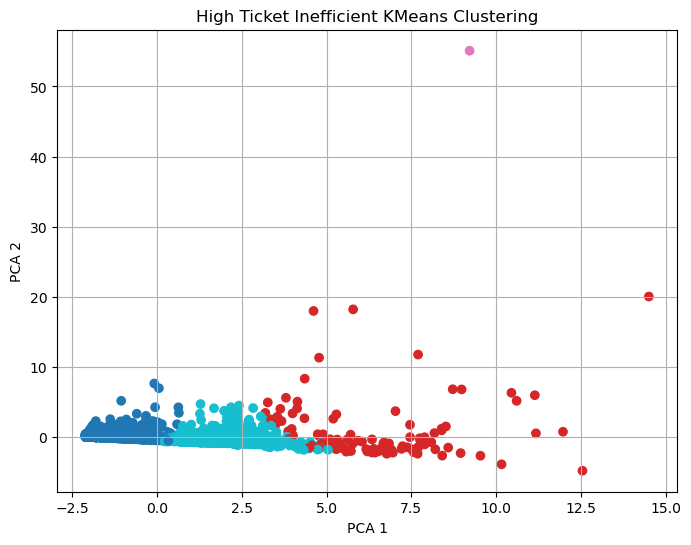

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

hv_pca = PCA(n_components=2)
lv_X_pca = hv_pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(lv_X_pca[:, 0], lv_X_pca[:, 1], c=df_hv_ineff['cluster'], cmap='tab10')
plt.title('High Ticket Inefficient KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [51]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df_hv_ineff['cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.541


## Low Value Inefficient Analysis

In [59]:
# Filter High-Value & Inefficient clients
lv_ineff = clients[clients['class'] == 'LowTicket_Inefficient'].copy()

# Build the reporting table
df_lv_ineff = lv_ineff.reset_index()[[
    'client_id',
    'channel',
    'median_ticket',
    'total_orders',
    'median_promotor_visits',
    'avg_orders_per_month',
    'avg_visits_per_month',
    'visit_order_gap',
    'efficiency',
    'inefficiency_cost',
    'median_promotor_calls',
    'total_promotor_calls',
    'total_profit',
    'profit_per_visit',
    'opportunity_cost'
]].sort_values('opportunity_cost', ascending=False)

# Display first 10 rows
df_lv_ineff.head(10)

,client_id,channel,median_ticket,total_orders,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost
1141,395867234,HR,76.780,24,4.0,2.000000,4.000000,2.000000,0.500,30.00,0.0,0.0,2530.68,52.722500,105.445000
303,176971189,AR,71.200,30,4.0,2.500000,4.000000,1.500000,0.500,22.50,0.0,0.0,2336.00,48.666667,73.000000
655,272030040,HR,77.220,13,4.0,1.083333,2.666667,1.583333,0.250,23.75,0.0,0.0,1221.47,38.170938,60.437318
1412,467036179,AR,63.620,35,4.0,2.916667,4.000000,1.083333,0.750,16.25,0.0,0.0,2345.51,48.864792,52.936858
676,277787416,HR,69.120,26,4.0,2.166667,4.000000,1.833333,0.500,27.50,0.0,0.0,1266.34,26.382083,48.367153
951,344661675,AR,74.550,31,4.0,2.583333,4.000000,1.416667,0.750,21.25,0.0,0.0,1391.98,28.999583,41.082743
2107,636431589,AR,78.740,15,2.0,1.250000,2.000000,0.750000,0.500,11.25,0.0,0.0,1289.02,53.709167,40.281875
2825,817086308,AR,54.025,18,4.0,1.500000,2.666667,1.166667,0.625,17.50,0.0,0.0,1090.94,34.091875,39.773854
3326,945057367,HR,74.800,9,4.0,0.750000,1.666667,0.916667,0.375,13.75,0.0,0.0,843.17,42.158500,38.645292
816,311395797,HR,77.830,21,4.0,1.750000,2.666667,0.916667,0.750,13.75,0.0,0.0,1318.22,41.194375,37.761510


In [60]:
df_channel_lv_ineff = (
    df_lv_ineff
    .groupby('channel')
    .agg(
        tickets_count         = ('median_ticket',   'count'),
        median_ticket         = ('median_ticket',   'median'),
        median_efficiency     = ('efficiency',      'median'),
        median_visit_order_gap= ('visit_order_gap', 'median')
    )
    .reset_index()
)

df_channel_lv_ineff 

,channel,tickets_count,median_ticket,median_efficiency,median_visit_order_gap
0,AR,1369,62.35,0.5,0.500000
1,HR,2171,57.27,0.5,0.583333


In [61]:
df_lv_ineff.describe()

,client_id,median_ticket,total_orders,median_promotor_visits,avg_orders_per_month,avg_visits_per_month,visit_order_gap,efficiency,inefficiency_cost,median_promotor_calls,total_promotor_calls,total_profit,profit_per_visit,opportunity_cost
count,3.540000e+03,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000,3540.000000
mean,5.517794e+08,58.364240,13.861299,3.047175,1.155108,1.812688,0.657580,0.546881,9.863701,0.212712,1.337288,85.657975,7.212019,2.056926
std,2.587063e+08,13.689009,11.724984,1.133766,0.977082,1.345102,0.558611,0.158122,8.379169,0.684637,5.268632,598.181960,15.928757,17.409793
min,1.003632e+08,-25.895000,1.000000,1.000000,0.083333,0.166667,-0.083333,0.125000,-1.250000,0.000000,0.000000,-23358.010000,-132.715966,-785.236132
25%,3.285343e+08,52.140000,5.000000,2.000000,0.416667,0.666667,0.250000,0.500000,3.750000,0.000000,0.000000,-45.602500,-3.552875,-1.611033
50%,5.498214e+08,59.030000,11.000000,3.000000,0.916667,1.500000,0.500000,0.500000,7.500000,0.000000,0.000000,64.575000,6.490208,1.967561
75%,7.714145e+08,68.642500,19.000000,4.000000,1.583333,2.666667,0.833333,0.750000,12.500000,0.000000,0.000000,281.805000,16.597500,7.554632
max,9.999406e+08,79.990000,105.000000,16.000000,8.750000,14.666667,6.500000,0.937500,97.500000,4.000000,48.000000,3205.650000,111.406667,105.445000


In [67]:
lv_inefficiency_cost= df_lv_ineff['inefficiency_cost'].sum().round()
print(f'The cost due to inefficiencies is €{lv_inefficiency_cost:,}')

lv_total_profit = (
    df_lv_ineff['profit_per_visit'] 
  * df_lv_ineff['total_orders']
).sum().round()

print(f'The total profit is €{lv_total_profit:,}')

lv_cost_of_opportunity = df_lv_ineff['opportunity_cost'].sum().round()
print(f'The cost of opportunity is €{lv_cost_of_opportunity:,}')  

lv_median_gap = df_lv_ineff['visit_order_gap'].median()
print(f'The median gap is {lv_median_gap:,}')

lv_avg_gap = df_lv_ineff['visit_order_gap'].std()
print(f'The std gap is {lv_avg_gap:,}')

The cost due to inefficiencies is €34,918.0
The total profit is €215,851.0
The cost of opportunity is €7,282.0
The median gap is 0.5
The std gap is 0.5586112622979773


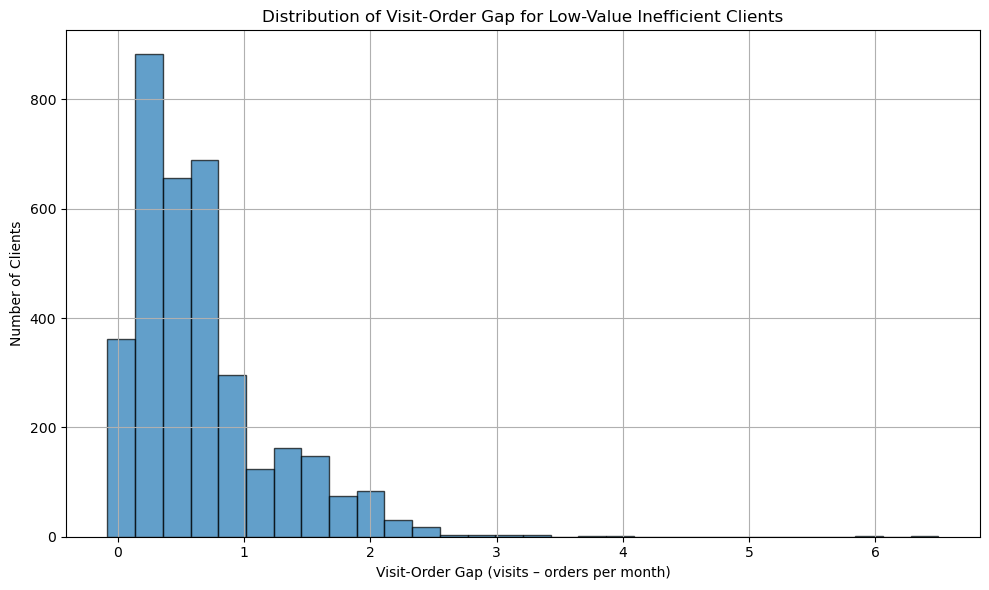

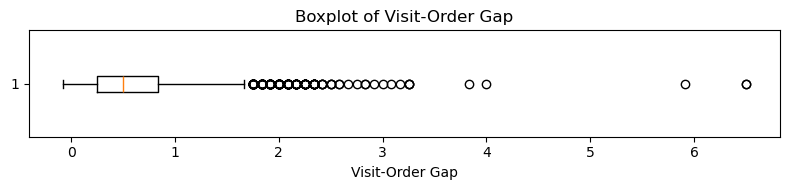

In [96]:
# Extract the gap
lv_gap = lv_ineff['visit_order_gap'].dropna()

#  Histogram
plt.figure(figsize=(10, 6))
plt.hist(lv_gap, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Visit-Order Gap (visits – orders per month)')
plt.ylabel('Number of Clients')
plt.title('Distribution of Visit-Order Gap for Low-Value Inefficient Clients')
plt.grid(True)
plt.tight_layout()
plt.show()

#  Boxplot
plt.figure(figsize=(8, 2))
plt.boxplot(lv_gap, vert=False)
plt.xlabel('Visit-Order Gap')
plt.title('Boxplot of Visit-Order Gap')
plt.tight_layout()
plt.show()

In [103]:
# define your bins and labels
lv_bins = [0, 1, 2, gap.max() + 1e-6]   # add a tiny epsilon so the max is included
lv_labels = ['0 ≤ gap < 1', '1 ≤ gap < 2', f'2 ≤ gap ≤ {gap.max():.1f}']

# cut into categories
categories = pd.cut(lv_gap, bins=lv_bins, right=False, labels=lv_labels)

# compute value counts as percentages
lv_pct = categories.value_counts(normalize=True) * 100

# print nicely
for label, p in lv_pct.items():
    print(f"{label}: {p:.2f}% of clients")

0 ≤ gap < 1: 79.01% of clients
1 ≤ gap < 2: 17.55% of clients
2 ≤ gap ≤ 6.5: 3.45% of clients




 ~79% under 1, only 3.45% are extreme.

 Insight: The majority of both groups hover around a low gap, meaning inefficiency is often subtle

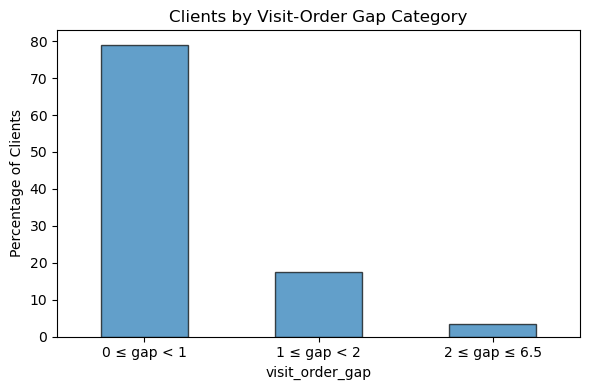

In [72]:
lv_pct.plot.bar(figsize=(6,4), edgecolor='black', alpha=0.7)
plt.ylabel('Percentage of Clients')
plt.title('Clients by Visit-Order Gap Category')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

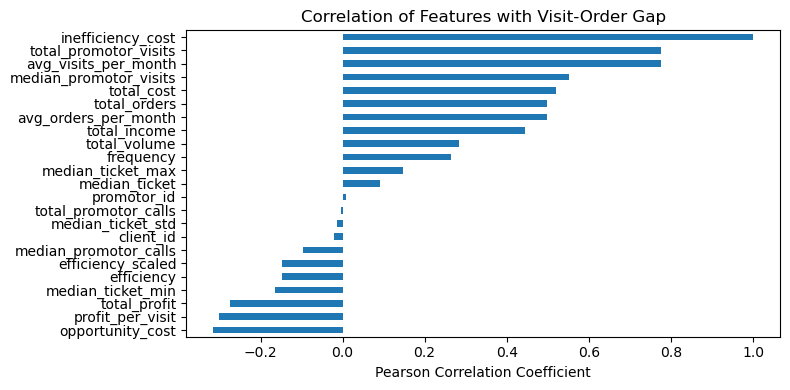

In [73]:
import numpy as np
numeric = lv_ineff.select_dtypes(include=[np.number])
lv_visit_corr = numeric.corr()['visit_order_gap'].drop('visit_order_gap').sort_values()

# 3) Plot bar chart
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
lv_visit_corr.plot(kind='barh')
plt.title('Correlation of Features with Visit-Order Gap')
plt.xlabel('Pearson Correlation Coefficient')
plt.tight_layout()
plt.show()

 Low-Ticket: opportunity cost has a slightly negative or near zero correlation, it seems that in this group their inefficiencies don’t translate into high financial loss.



margin_segment
low_margin     3480
high_margin      60
Name: count, dtype: int64
                 count      mean       std       min       25%   50%  \
margin_segment                                                         
high_margin       60.0  0.337500  0.219369  0.000000  0.166667  0.25   
low_margin      3480.0  0.663099  0.561084 -0.083333  0.250000  0.50   

                     75%       max  
margin_segment                      
high_margin     0.500000  0.916667  
low_margin      0.833333  6.500000  


<Figure size 800x500 with 0 Axes>

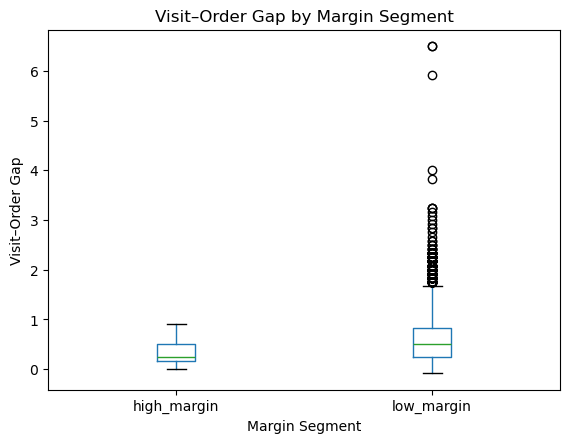

In [74]:
# 1) Compute a margin metric for each client
lv_ineff['profit_margin'] = lv_ineff['total_profit'] / lv_ineff['total_cost']

# 2) Split into “low-margin” vs “high-margin”
#    Here I use the median margin as a cut-off; you can also use quantiles (e.g. pd.qcut) or a business threshold.
lv_median_margin = lv_ineff['profit_margin'].median()
lv_ineff['margin_segment'] = lv_ineff['profit_margin'].apply(
    lambda m: 'low_margin' if m < median_margin else 'high_margin'
)

# 3) Check how many in each segment
print(lv_ineff['margin_segment'].value_counts())

# 4) Compare the visit–order gap distributions
summary = lv_ineff.groupby('margin_segment')['visit_order_gap'].describe()
print(summary)

# 5) (Optional) Visualize side-by-side
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
lv_ineff.boxplot('visit_order_gap', by='margin_segment', grid=False)
plt.suptitle('')
plt.title('Visit–Order Gap by Margin Segment')
plt.xlabel('Margin Segment')
plt.ylabel('Visit–Order Gap')
plt.show()

nsight: Low-margin clients are not only less profitable, they also show greater inefficiency (higher visit gaps), which justifies intervention.

In [75]:
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

# 1) Summary stats
lv_grouped = lv_ineff.groupby('margin_segment')['visit_order_gap']
lv_summary = lv_grouped.agg(count='count', mean='mean', median='median', std='std')
print("Summary statistics by margin segment:\n", lv_summary)

# 2) Extract the two arrays
lv_high_gap = lv_ineff.loc[lv_ineff.margin_segment=='high_margin', 'visit_order_gap']
lv_low_gap  = lv_ineff.loc[lv_ineff.margin_segment=='low_margin',  'visit_order_gap']

# 3) Welch’s t-test (doesn’t assume equal variances)
lv_t_stat, lv_p_val = ttest_ind(lv_low_gap, lv_high_gap, equal_var=False)
print(f"\nWelch’s t-test: t = {lv_t_stat:.3f}, p = {lv_p_val:.3f}")

# 4) Mann–Whitney U (non-parametric)
lv_u_stat, lv_p_u = mannwhitneyu(lv_low_gap, lv_high_gap, alternative='two-sided')
print(f"Mann–Whitney U: U = {lv_u_stat:.3f}, p = {lv_p_u:.3f}")


Summary statistics by margin segment:
                 count      mean  median       std
margin_segment                                   
high_margin        60  0.337500    0.25  0.219369
low_margin       3480  0.663099    0.50  0.561084

Welch’s t-test: t = 10.899, p = 0.000
Mann–Whitney U: U = 143709.000, p = 0.000


In [76]:

# 1) Select your extended feature list
features = [
    'avg_visits_per_month',
    'total_promotor_visits',
    'total_orders',
    'total_cost',
    'total_income',
    'total_profit',
    'frequency',
    'efficiency',
    'efficiency_scaled',
    'profit_margin'
]

X = lv_ineff[features]
y = lv_ineff['visit_order_gap']

# 2) Fit a simple RF
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# 3) Examine importances
importances = pd.Series(model.feature_importances_, index=features)
print("Feature importances (RF):")
print(importances.sort_values(ascending=False))

# 4) (Optional) Quick 5-fold CV to get an R² estimate
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"\n5-fold CV R²: {scores.mean():.3f} ± {scores.std():.3f}")

Feature importances (RF):
avg_visits_per_month     0.373619
total_promotor_visits    0.301518
efficiency_scaled        0.115988
efficiency               0.109004
total_orders             0.041774
total_cost               0.034460
frequency                0.007043
total_income             0.005975
total_profit             0.005437
profit_margin            0.005180
dtype: float64

5-fold CV R²: 0.979 ± 0.011


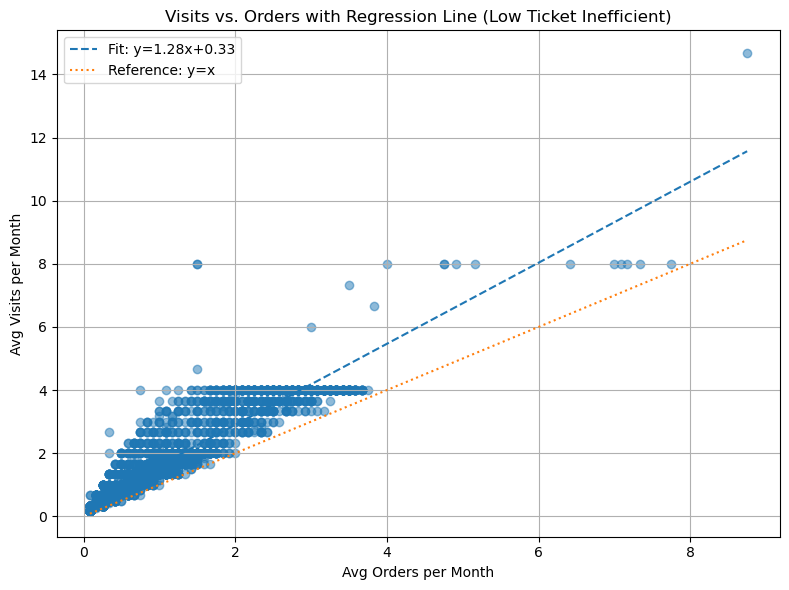

In [77]:
x = lv_ineff['avg_orders_per_month']
y = lv_ineff['avg_visits_per_month']

#  Fit a linear regression line
slope, intercept = np.polyfit(x, y, deg=1)

# Line endpoints
x_line = np.array([x.min(), x.max()])
y_line = slope * x_line + intercept


plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.plot(x_line, y_line, linestyle='--', label=f'Fit: y={slope:.2f}x+{intercept:.2f}')
plt.plot(x_line, x_line, linestyle=':', label='Reference: y=x')

plt.xlabel('Avg Orders per Month')
plt.ylabel('Avg Visits per Month')
plt.title('Visits vs. Orders with Regression Line (Low Ticket Inefficient)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# drop extreme order‐volume outliers
mask = lv_ineff['avg_orders_per_month'] <= 30
lv_typical = lv_ineff[mask]

# fit again
slope_t, intercept_t = np.polyfit(
    lv_typical['avg_orders_per_month'],
    lv_typical['avg_visits_per_month'],
    deg=1
)
print(f"Refit slope (orders≤30): {slope_t:.2f}")

Refit slope (orders≤30): 1.28


For every 1 additional order per month, promotors need to make 1.28 visits. Even less efficient than the high-ticket group (1.24).

Even clients who place 0 orders still get ~0.33 visits per month similar baseline as the other group.

In [84]:
lv_clustering_features = [
    'median_ticket',
    'avg_visits_per_month',
    'avg_orders_per_month',
    'visit_order_gap',
    'inefficiency_cost',
    'opportunity_cost',
    
]

from sklearn.preprocessing import StandardScaler

X = df_lv_ineff[lv_clustering_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [85]:
from sklearn.cluster import KMeans

lv_kmeans = KMeans(n_clusters=4, random_state=42)
df_lv_ineff['cluster'] = lv_kmeans.fit_predict(X_scaled)

In [86]:

lv_cluster_counts = df_lv_ineff['cluster'].value_counts().rename('Clients')

lv_cluster_medians = df_lv_ineff.groupby('cluster')[hv_clustering_features].median().round(2)

df_lv_cluster_summary = pd.concat([lv_cluster_medians, lv_cluster_counts], axis=1).reset_index()

cols = ['cluster', 'Clients'] + lv_clustering_features
df_lv_cluster_summary = df_lv_cluster_summary[cols]

# 5. Display the result
df_lv_cluster_summary = df_lv_cluster_summary .sort_values(by='Clients', ascending=False).reset_index(drop=True)
df_lv_cluster_summary

,cluster,Clients,median_ticket,avg_visits_per_month,avg_orders_per_month,visit_order_gap,inefficiency_cost,opportunity_cost
0,2,1585,65.93,1.50,0.92,0.50,7.50,6.58
1,0,999,48.38,0.50,0.25,0.25,3.75,0.04
2,1,955,60.68,4.00,2.42,1.25,18.75,-1.99
3,3,1,20.63,14.67,8.75,5.92,88.75,-785.24


In [87]:
# 1. Total opportunity cost per cluster
lv_opportunity_cost_total = df_lv_ineff.groupby('cluster')['opportunity_cost'].sum().round(2).rename('Total_Opportunity_Cost')

# 2. Count of clients per cluster
lv_cluster_counts = df_lv_ineff['cluster'].value_counts().rename('Size')

# 3. Median values of relevant features
lv_cluster_medians = df_lv_ineff.groupby('cluster')[lv_clustering_features].median().round(2)

# 4. Combine all into one summary table
df_lv_cluster_summary = pd.concat([lv_cluster_medians, lv_cluster_counts, lv_opportunity_cost_total], axis=1).reset_index()

# 5. Sort by Size (descending)
df_lv_cluster_summary = df_lv_cluster_summary.sort_values(by='Size', ascending=False).reset_index(drop=True)

# 6. Display
df_lv_cluster_summary


,cluster,median_ticket,avg_visits_per_month,avg_orders_per_month,visit_order_gap,inefficiency_cost,opportunity_cost,Size,Total_Opportunity_Cost
0,2,65.93,1.50,0.92,0.50,7.50,6.58,1585,11550.20
1,0,48.38,0.50,0.25,0.25,3.75,0.04,999,-601.90
2,1,60.68,4.00,2.42,1.25,18.75,-1.99,955,-2881.55
3,3,20.63,14.67,8.75,5.92,88.75,-785.24,1,-785.24


In [89]:
df_lv_ineff['opportunity_cost'].sum().round(2)

np.float64(7281.52)

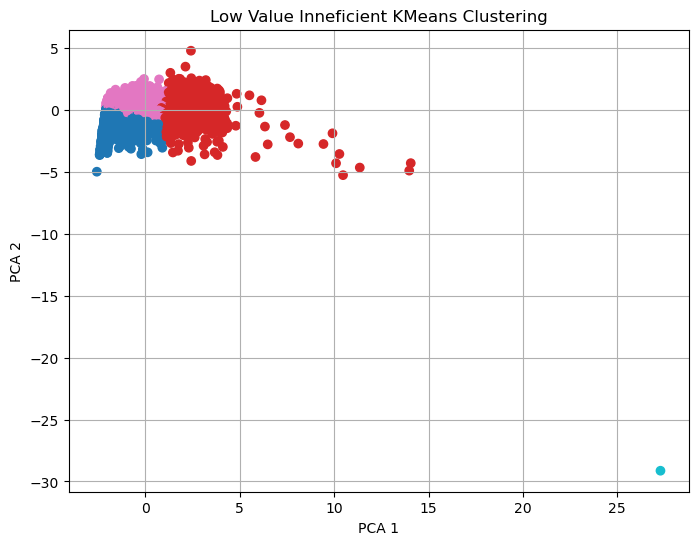

In [88]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

lv_pca = PCA(n_components=2)
lv_X_pca = lv_pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(lv_X_pca[:, 0], lv_X_pca[:, 1], c=df_lv_ineff['cluster'], cmap='tab10')
plt.title('Low Value Inneficient KMeans Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.grid(True)
plt.show()

In [91]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df_lv_ineff['cluster'])
print(f'Silhouette Score: {score:.3f}')

Silhouette Score: 0.306


### Strategic Actions:

Cluster 0: Main opportunity — large size, still net positive.


Cluster 1: Low risk but low reward — might be manageable.

Cluster 2: Biggest concern → Promotors make ~4 visits/month for ~2.4 orders → inefficient and not worth the effort, lead net financial loss. Explore cutting visits, just calls

Cluster 3: One client, scan it



### Insights: Low-Ticket Inefficient Clients


1. Low value per client = high fragility
Median ticket values mostly range from ~€20 to €65.

With such tight margins, even small inefficiencies or returns push these clients into negative profitability.

In the clustering, ~75% of the total group generated very low or negative opportunity cost.

2. Refunds are a major driver of loss
Several clusters show negative total opportunity cost, not just low.



Insight: Client retention alone isn’t enough — even “loyal” clients can be net negative.

### Key Insights
1. Both groups are behaviorally similar (efficiency, visit gap)
Promotors over-visit across both groups.

   Both show slopes > 1 in regression → more than one visit per order.

2. High-Ticket inefficiencies are more financially dangerous
same inefficiency leads to bigger revenue loss.

Example: One cluster (only 1,292 clients) cost the company €100,671.95 in opportunity cost.

3. Low-Ticket inefficiencies often lead to negative return
Margins are too tight to support promotor visits.

   Refunds in some clusters make clients net negative, even with orders.

4. Clustering works better for High-Ticket group
Better separation, clearer strategy per cluster.

Low-Ticket clustering suggests simplifying instead of segmenting.